In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
sector = 27
path = f'/fred/oz335/projects/highlat_transients/events_sig10maxevents1/Sector{sector}/events.csv'

In [27]:
sector_events = pd.read_csv(path)

In [28]:
sector_events 

objid  eventid classification                  TSS Catalogue  sector  \
0      651        1              -  TSS 191821.23-495111.73T59043      27   
1     1854        1              -  TSS 191756.09-505537.54T59050      27   
2     1421        1              -  TSS 193415.26-495415.93T59049      27   
3     2245        1              -  TSS 192149.89-481452.72T59050      27   
4     3094        1            VRM  TSS 191406.42-481625.01T59058      27   
..     ...      ...            ...                            ...     ...   
412   2348        1              -  TSS 050527.16-564043.14T59047      27   
413   2524        1        RRLyrae  TSS 054707.60-634433.10T59042      27   
414    282        1        RRLyrae  TSS 044749.60-591048.33T59035      27   
415    325        1              -  TSS 044749.60-591048.33T59035      27   
416   2243        1              -  TSS 044524.81-602736.94T59044      27   

     camera  ccd  cut   xcentroid   ycentroid  ...  peak_freq  peak_power  \
0         1    1    1  323.777785  387.999940  ...   0.073910    1.517576   
1         1    1    1  289.502453  189.444444  ...   1.626024    3.119947   
2         1    1    2  272.656769  345.500000  ...   0.057486    3.586634   
3         1    1    5  459.985331  162.350573  ...   0.000000    0.000000   
4         1    1    5  225.721004  169.185580  ...   0.000000    0.000000   
..      ...  ...  ...         ...         ...  ...        ...         ...   
412       4    4   12  262.217013  217.181257  ...   0.000000    0.000000   
413       4    4   13  364.476810  251.343916  ...   1.149689    1.706708   
414       4    4   16  293.884531  305.145144  ...   0.000000    0.000000   
415       4    4   16  293.884531  305.145144  ...   0.000000    0.000000   
416       4    4   16  179.581236  507.109896  ...   0.238150    1.301109   

     prob               GaiaID  cf_class  cf_prob  source_mask  n_detections  \
0     NaN  6658188976643674112     RRLyr  0.76500            1             4   
1     NaN                    -     RRLyr  0.94000            0             8   
2     NaN  6647107200806866944       LPV  0.61500            1             4   
3     NaN  6660022030028855296     Non-V  0.80001            5             2   
4     NaN  6661558017709971456       LPV  0.63500            1             3   
..    ...                  ...       ...      ...          ...           ...   
412   NaN  4764335963652231168       LPV  0.59500            1            11   
413   NaN                    -     RRLyr  0.64000            1             8   
414   NaN  4773984281265086464     Non-V  0.85500            0            15   
415   NaN                    -     Non-V  0.85500            1            15   
416   NaN                    -       LPV  0.65000            4             7   

     total_events  Asteroid  
0               1       0.0  
1               1       0.0  
2               1       0.0  
3               1       0.0  
4               1       0.0  
..            ...       ...  
412             1       0.0  
413             1       0.0  
414             1       0.0  
415             1       0.0  
416             1       0.0  

[417 rows x 51 columns]

Text(0, 0.5, 'Max LC S/N')

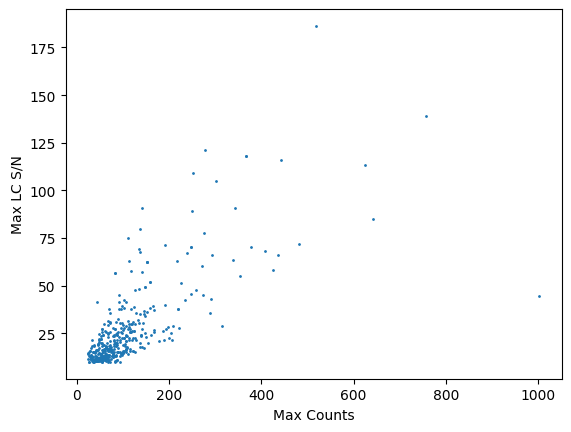

In [29]:
plt.figure()
plt.scatter(sector_events['flux_max'],sector_events['lc_sig_max'],s=1)
plt.xlabel('Max Counts')
plt.ylabel('Max LC S/N')

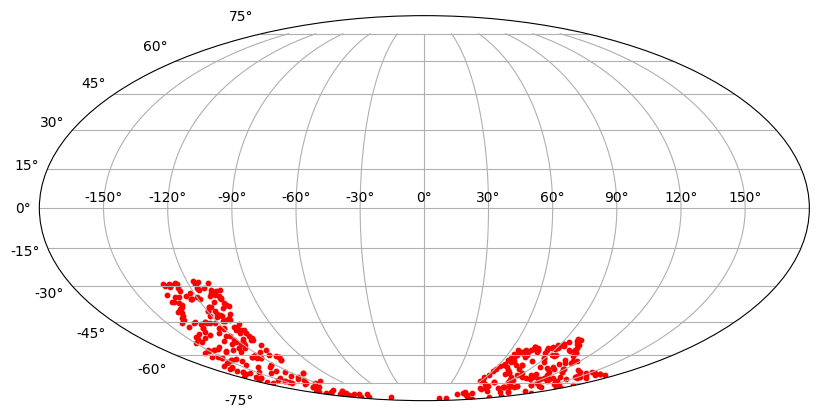

In [30]:
ra_rad = np.radians(sector_events['ra'])
dec_rad = np.radians(sector_events['dec'])

ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad = -(ra_rad - np.pi)

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
ax.scatter(ra_rad, dec_rad, s=10, color="red")
ax.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
noise = np.random.rand(3000)*5

In [11]:
noise[305] = 200

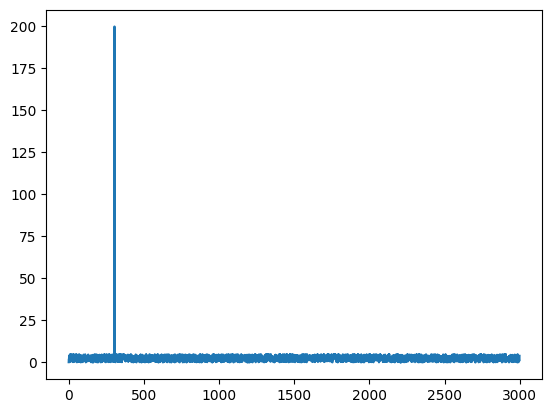

In [7]:
plt.figure()
plt.plot(noise)

In [12]:
np.nanstd(noise)

3.887314016180719

In [ ]:
sector = 36
path = f'/fred/oz335/projects/highlat_transients/events_sig10maxevents5/Sector{sector}/events.csv'
events = pd.read_csv(path)

In [4]:
events = pd.read_csv(path)

In [17]:
events[events.objid==3516]

objid  eventid classification            TSS Catalogue  sector  camera  \
204   3516        1              -  TSS 052051.43-615447.03      35       4   
205   3516        3              -  TSS 052051.65-615451.65      35       4   

     ccd  cut  xcentroid   ycentroid  ...  peak_freq  peak_power  prob  \
204    3   15  74.306724  196.848058  ...   0.096081    4.112216   NaN   
205    3   15  74.541464  196.854506  ...   0.096081    4.112216   NaN   

     GaiaID  cf_class  cf_prob  source_mask  n_detections  total_events  \
204       -       LPV    0.625            1             3             3   
205       -       LPV    0.625            1             5             3   

     Asteroid  
204         0  
205         0  

[2 rows x 51 columns]

In [2]:
from tessellate import Detector

In [55]:
d = Detector(sector=35,cam=2,ccd=3,n=4,data_path='/fred/oz335/TESSdata')
d._gather_results(cut=8,objects=False)

In [56]:
d.sources[d.sources.objid==1143][['frame','xcentroid']]

frame  xcentroid
37277   1848  52.803522
59843   2241  52.788196
96451   2790  52.360658

In [5]:
fast = events[(events.n_detections==2)&(events.frame_duration>2)]

In [6]:
fast

objid  eventid classification            TSS Catalogue  sector  camera  \
2      289        1              -  TSS 110035.25-230758.72      36       1   
6     2183        2              -  TSS 103847.61-162719.88      36       1   
7     1273        1              -  TSS 104227.06-133610.00      36       1   
11    1727        2              -  TSS 110322.93-155210.65      36       1   
24     831        3              -  TSS 113804.58-230040.32      36       1   
32     864        2              -  TSS 115333.99-070751.09      36       1   
47    2292        2              -  TSS 120338.19-192633.74      36       1   
48    2655        2              -  TSS 120440.43-162644.18      36       1   
50     492        2              -  TSS 111531.50-032128.00      36       1   
63     527        2              -  TSS 111018.60-085648.14      36       1   
67    1745        2              -  TSS 110034.44-123309.99      36       1   
92     393        2              -  TSS 111830.69-350334.71      36       2   
98    1867        1              -  TSS 111247.41-392344.61      36       2   
226    246        4              -  TSS 065639.59-651703.64      36       4   
243   3848        2              -  TSS 062454.18-565435.37      36       4   
264   2401        2              -  TSS 044739.14-584758.68      36       4   
285   2850        1              -  TSS 052932.72-562243.71      36       4   
286   2498        1              -  TSS 051215.52-601150.37      36       4   
290   2744        2              -  TSS 053716.71-575655.34      36       4   
291   4508        2              -  TSS 054751.74-573946.81      36       4   
292   4533        2              -  TSS 055136.51-574510.38      36       4   
311   3894        2              -  TSS 042650.17-702431.92      36       4   
312   1889        1              -  TSS 041821.96-731021.47      36       4   
323   2084        2              -  TSS 043804.50-751111.25      36       4   

     ccd  cut   xcentroid   ycentroid  ...  peak_freq  peak_power  prob  \
2      1    8   56.125433   27.373058  ...   0.071781    8.279332   NaN   
6      1    9  254.059791  127.890272  ...   0.071781    3.454944   NaN   
7      1   13  162.966966  132.082570  ...   0.000000    0.000000   NaN   
11     1   15  119.222199  182.202314  ...   0.071781   10.744878   NaN   
24     2   10  251.076241  171.999980  ...   0.071780    5.364419   NaN   
32     3    4  233.639372  224.000029  ...   0.000000    0.000000   NaN   
47     3   14   56.337649  505.895013  ...   0.000000    0.000000   NaN   
48     3   14  209.935306    9.186249  ...   0.000000    0.000000   NaN   
50     4    3  373.500000  279.865486  ...   0.000000    0.000000   NaN   
63     4   11  141.111113  258.664390  ...   0.000000    0.000000   NaN   
67     4   15  240.046873  486.500000  ...   0.079757    4.410175   NaN   
92     3   11   94.898956   61.686730  ...   1.435596   14.437316   NaN   
98     3   14  475.440591  311.190304  ...   0.071780    3.874024   NaN   
226    2    9   36.843264   65.000031  ...   0.000000    0.000000   NaN   
243    2   12   41.999963  464.285819  ...   0.000000    0.000000   NaN   
264    3    2  459.711761  508.369776  ...   0.000000    0.000000   NaN   
285    3    9  375.080689  369.041262  ...   0.000000    0.000000   NaN   
286    3   11   73.209797   79.643090  ...   0.000000    0.000000   NaN   
290    3   14  126.856175   67.470545  ...   0.000000    0.000000   NaN   
291    3   14   63.225849  308.222165  ...   0.000000    0.000000   NaN   
292    3   14   76.753735  395.351613  ...   0.000000    0.000000   NaN   
311    4    6  333.050576  274.073894  ...   0.000000    0.000000   NaN   
312    4    7  315.051228  343.717866  ...   0.000000    0.000000   NaN   
323    4   12   45.831928  177.226396  ...   0.071780    2.295813   NaN   

                  GaiaID  cf_class  cf_prob  source_mask  n_detections  \
2                      -     Non-V  0.54000            0             2   
6    

In [20]:
fast[fast.objid==1143][['frame_start','frame_end']]

frame_start  frame_end
77         2786       2790

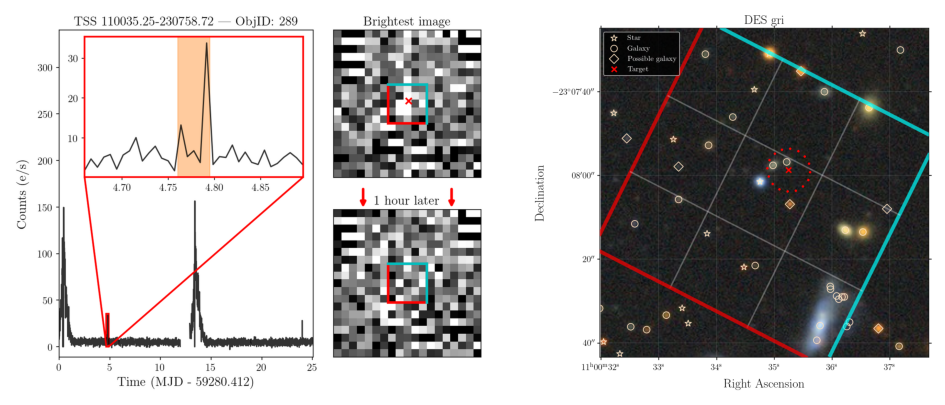

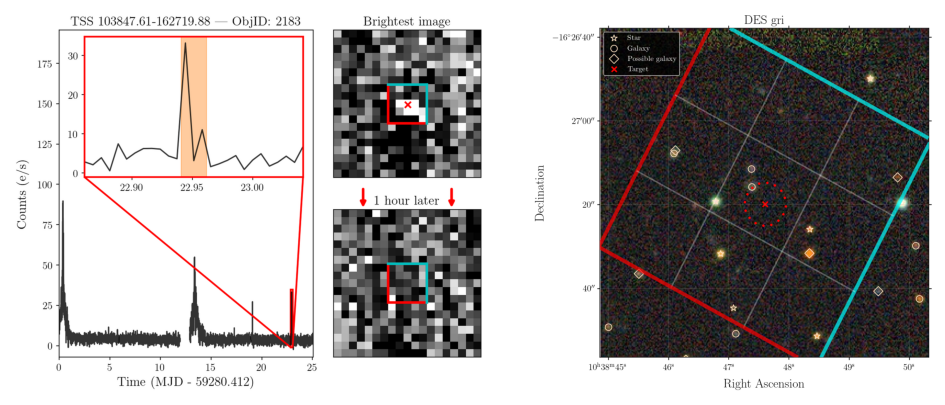

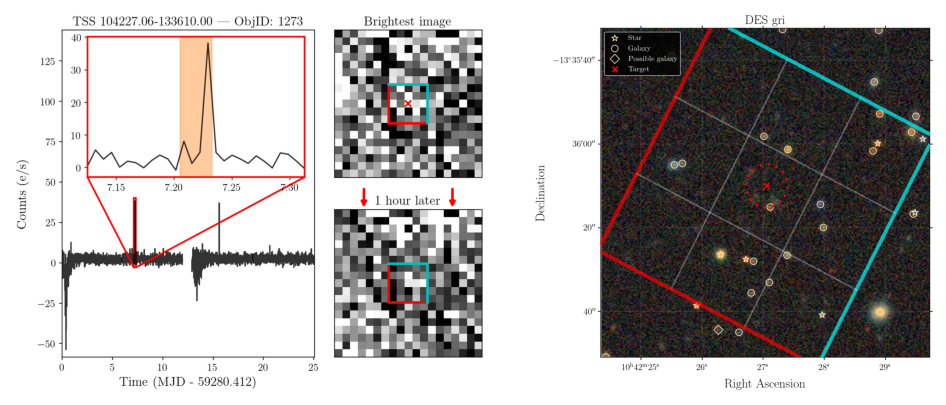

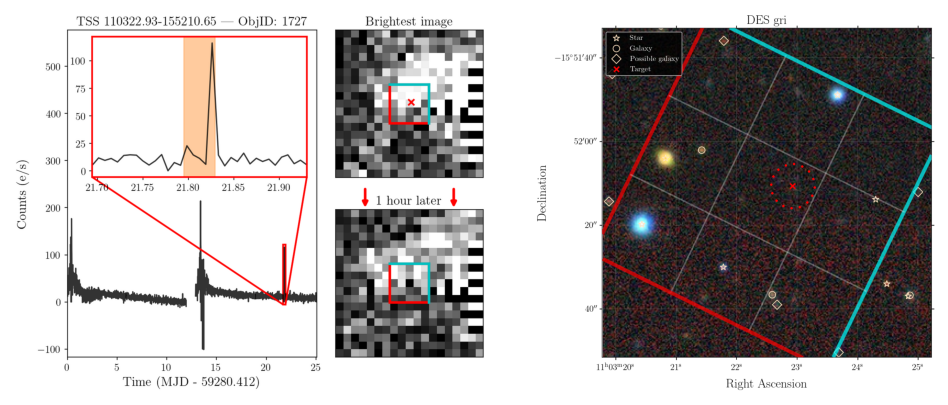

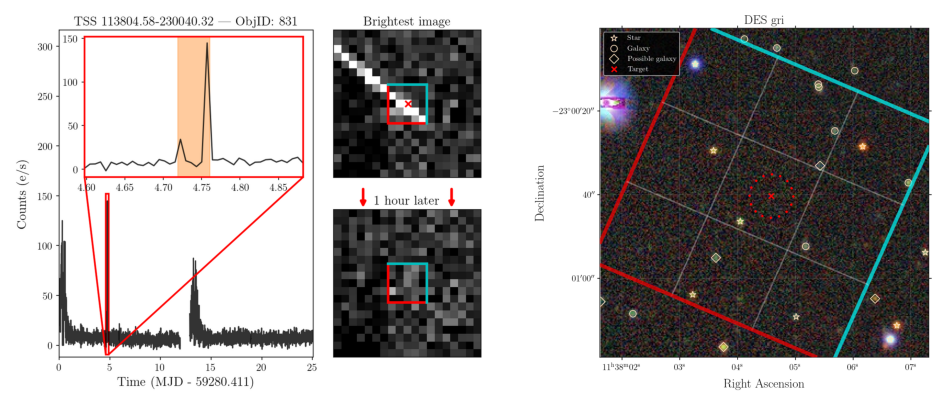

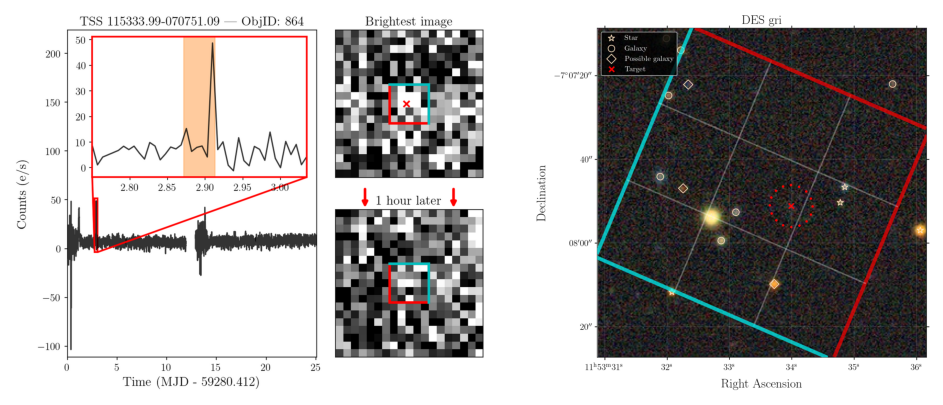

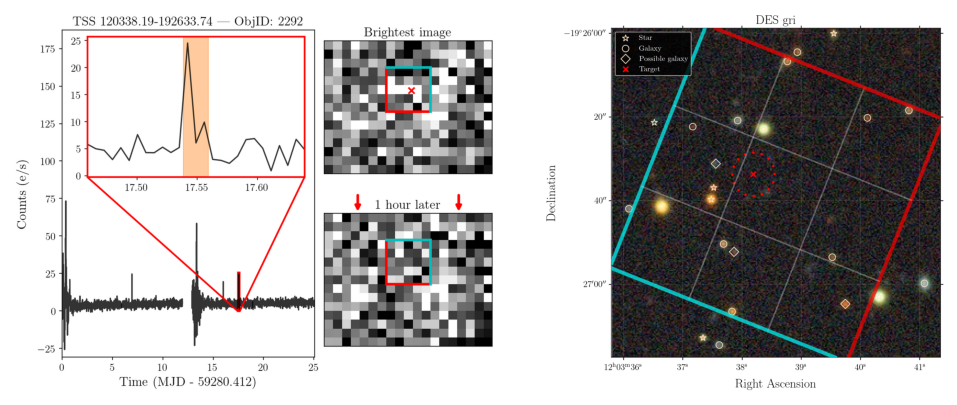

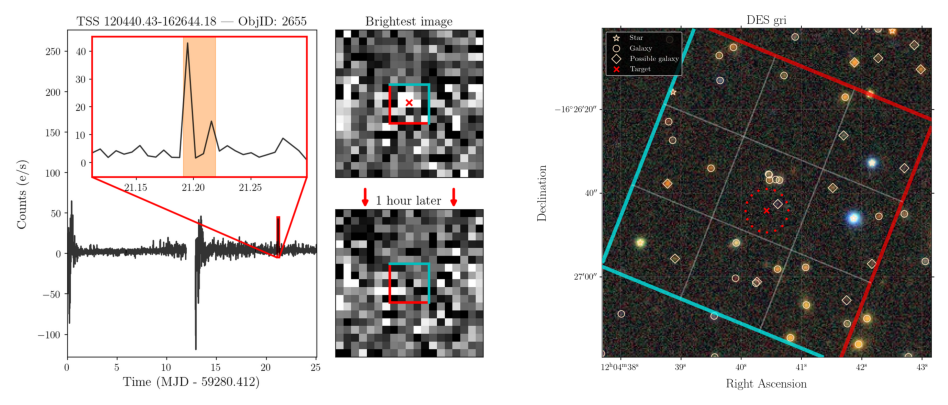

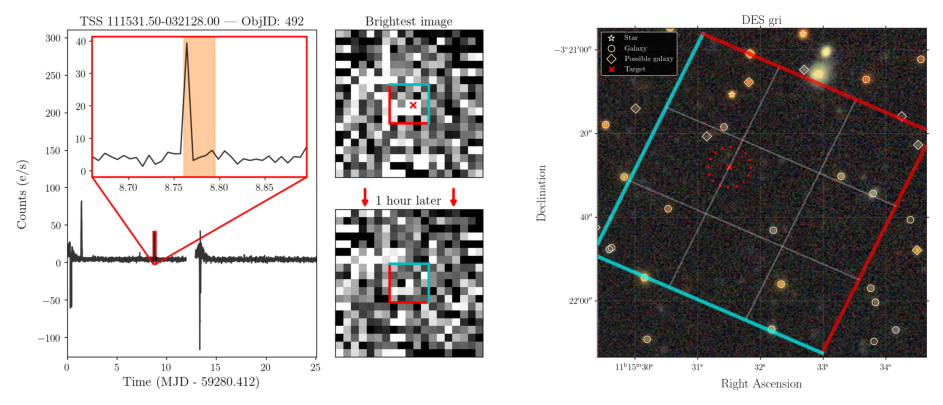

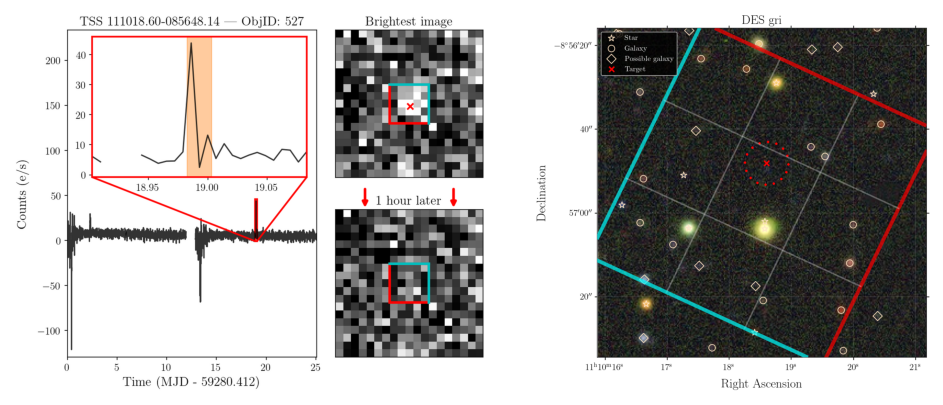

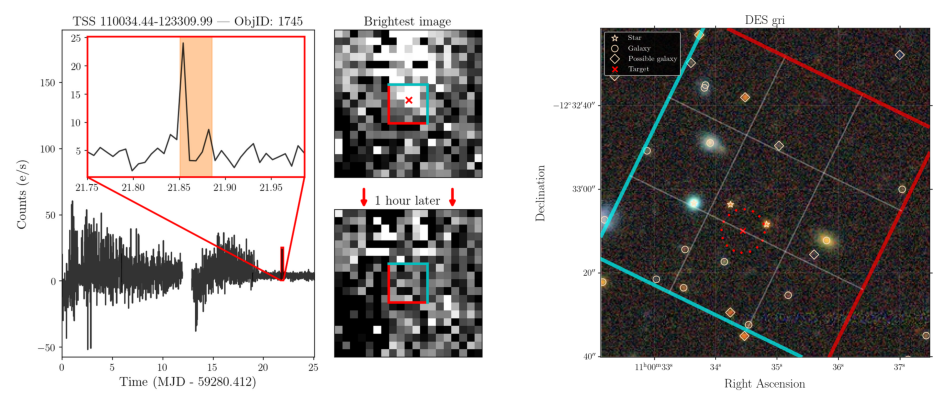

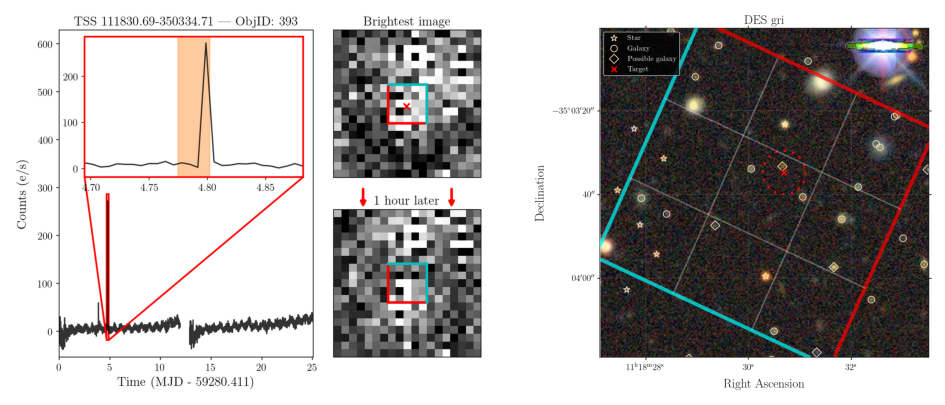

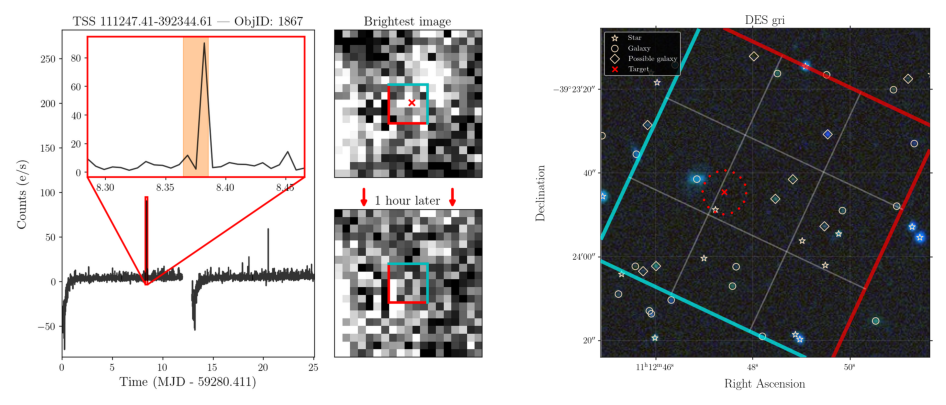

FileNotFoundError: [Errno 2] No such file or directory: '/fred/oz335/projects/highlat_transients/events_sig10maxevents5/Sector36/S36C4C2C9O246E4.png'

In [7]:
from PIL import Image
for i in range(len(events)):
    ev = fast.iloc[i]
    s = ev['sector']
    cam = ev['camera']
    ccd = ev['ccd']
    cut = ev['cut']
    objid = ev['objid']
    eventid = ev['eventid']
    path = f'/fred/oz335/projects/highlat_transients/events_sig10maxevents5/Sector{s}/S{s}C{cam}C{ccd}C{cut}O{objid}E{eventid}.png'
    im = Image.open(path)
    plt.figure(figsize=(15,5))
    plt.imshow(im)
    plt.axis("off")  # hide axes
    plt.show()

In [3]:
from tessellate import Detector

d = Detector(sector=35,cam=3,ccd=4,n=4,data_path='/fred/oz335/TESSdata')

In [4]:
frames = d.event_frames(cut=1,objid=2954,eventid=2)

In [6]:
import matplotlib.pyplot as plt

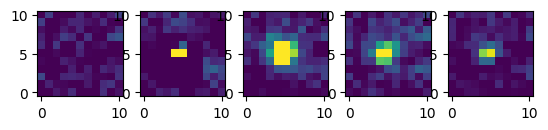

In [7]:
fig,ax = plt.subplots(ncols=5)
for i in range(5):
    ax[i].imshow(frames[i],origin='lower',vmin=0,vmax=10)

In [9]:
d.events[d.events.objid==2954][['frame_start']]

frame_start
68318         1534
68319         1840

In [11]:
d.events[d.events.objid==2954][['ra','dec']]

ra        dec
68318  116.319790 -61.591875
68319  116.321698 -61.591642

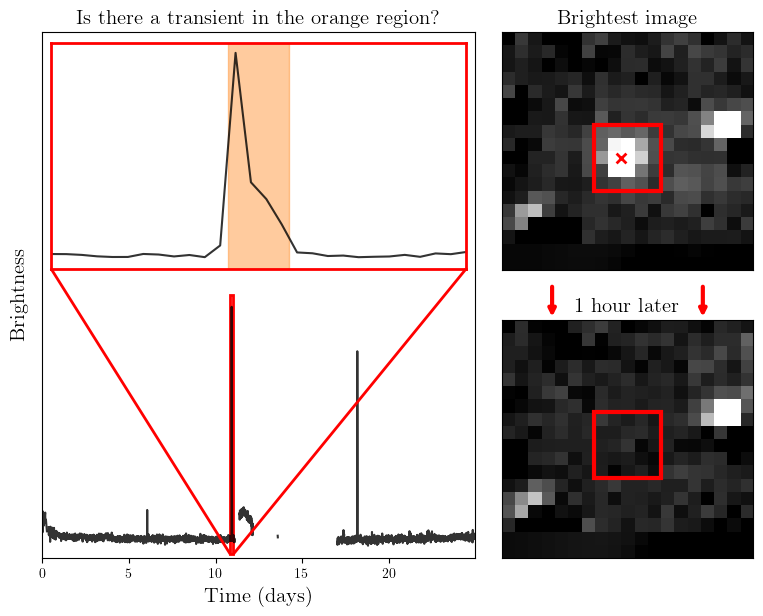

In [12]:
obj = d.plot_object(cut=1,objid=2954,event=1)

In [1]:
import tessreduce as tr

getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is below -30 dec, calibrating to SkyMapper photometry.
!!!WARNING!!! field calibration is unreliable, using the default zp = 20.44


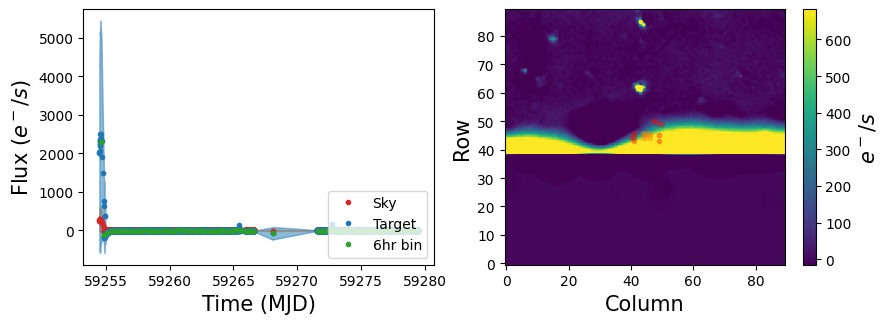

In [2]:
tess = tr.tessreduce(ra=116.319790, dec=-61.591875,sector=35)

(-10.0, 200.0)

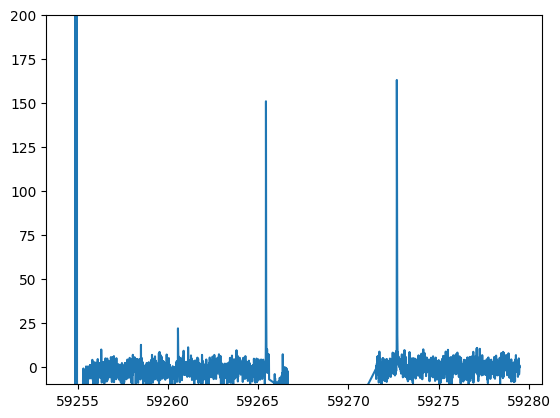

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tess.lc[0],tess.lc[1])
plt.ylim(-10,200)

In [6]:
tr.spacetime_lookup(tess.ra,tess.dec)

!!! WARNING no MJD time specified, using default of 59000
|   Sector |   Camera |   CCD | Covers   |   Time difference  |
|          |          |       |          |             (days) |
|----------+----------+-------+----------+--------------------|
|        1 |        4 |     3 | False    |               -648 |
|        3 |        4 |     4 | False    |               -591 |
|        4 |        4 |     4 | False    |               -563 |
|        6 |        4 |     1 | False    |               -510 |
|        7 |        4 |     1 | False    |               -484 |
|        8 |        4 |     1 | False    |               -458 |
|        9 |        3 |     3 | False    |               -432 |
|       10 |        4 |     2 | False    |               -405 |
|       11 |        4 |     2 | False    |               -376 |
|       13 |        4 |     3 | False    |               -318 |
|       27 |        4 |     3 | False    |                 34 |
|       28 |        4 |     3 | False    |    

[[116.31979, -61.591875, 1, 4, 3, False],
 [116.31979, -61.591875, 3, 4, 4, False],
 [116.31979, -61.591875, 4, 4, 4, False],
 [116.31979, -61.591875, 6, 4, 1, False],
 [116.31979, -61.591875, 7, 4, 1, False],
 [116.31979, -61.591875, 8, 4, 1, False],
 [116.31979, -61.591875, 9, 3, 3, False],
 [116.31979, -61.591875, 10, 4, 2, False],
 [116.31979, -61.591875, 11, 4, 2, False],
 [116.31979, -61.591875, 13, 4, 3, False],
 [116.31979, -61.591875, 27, 4, 3, False],
 [116.31979, -61.591875, 28, 4, 3, False],
 [116.31979, -61.591875, 30, 4, 4, False],
 [116.31979, -61.591875, 31, 4, 4, False],
 [116.31979, -61.591875, 33, 4, 1, False],
 [116.31979, -61.591875, 34, 4, 1, False],
 [116.31979, -61.591875, 35, 3, 4, False],
 [116.31979, -61.591875, 35, 4, 1, False],
 [116.31979, -61.591875, 36, 3, 3, False],
 [116.31979, -61.591875, 37, 4, 2, False],
 [116.31979, -61.591875, 38, 4, 2, False],
 [116.31979, -61.591875, 61, 4, 1, False],
 [116.31979, -61.591875, 62, 3, 4, False],
 [116.31979, -61.5

getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
aligning images
!!Re-running for difference image!!
shifting images
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
remade mask
background
background correlation correction
field calibration
target is below -30 dec, calibrating to SkyMapper photometry.


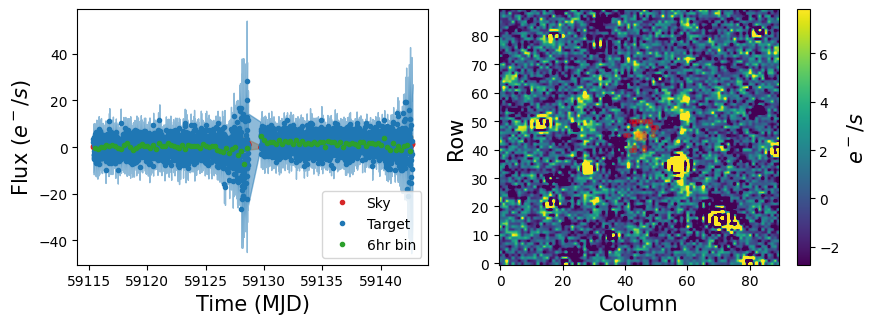

In [3]:
tess2 = tr.tessreduce(ra=116.319790, dec=-61.591875,sector=30)

In [10]:
sector = 27
path = f'/fred/oz335/projects/highlat_transients/events_sig10maxevents5/Sector{sector}/events.csv'
events = pd.read_csv(path)

In [13]:
events[events.objid==3383][['com_motion','gaussian_score']]

com_motion  gaussian_score
62    0.145252         0.96615